In [9]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm






beta_rel=0.09423258405
gamma = 1.004469679

current=0.6 #A
cooler_length = 3 # m cooler length
r_beam=25*1e-3 #m

T_perp = 0.01 # <E> [eV] = kb*T
T_l =  0.001 # <E> [eV]
magnetic_field = 0.07 # T for LEIR
B_ratio=0


mass0=193729.0248722061*1e6 #eV/c2
c=299792458.0
p0c = mass0*beta_rel*gamma #eV/c

print('p0c:',p0c*1e-6)

circumference = 78.54370266 #m
T = circumference/(c*beta_rel)
ms_per_turn = 1000*T
s_per_turn = T

# mass0=

beta_x=5
beta_y=5


disp_x=0
Q_x=1.82
Q_y=2.72
dQx=-0.0005113579791
dQy=-0.0001665178543

arc = xt.LineSegmentMap(
        qx=Q_x, qy=Q_y, qs=0,
        dqx=dQx, dqy=dQy,
        bets = 1*1e40, length=circumference,
        betx=beta_x,
        bety=beta_y
        )





num_particles=int(1e6)

#x=np.random.normal(0,np.sqrt(5*emittance) ,num_particles),
#px=np.random.normal(0, np.sqrt(emittance/5), num_particles),
#x=np.linspace(1*1e-3, 20*1e-3, num_particles),
#px=np.random.uniform(0, 0, num_particles),





p0c: 18337.183231339193


In [10]:
#force againt velocity

emittance=14*1e-6 #inital emittance

px=np.random.normal(0, 4*np.sqrt(emittance/beta_x), num_particles)

dtk_particle = dtk.TestParticles(
    
    mass0=mass0,
    p0c=p0c,
    x=np.random.normal(0,0 ,num_particles),
    px=px,
    y=np.random.normal(0, 1e-9 ,num_particles),
    py=np.random.normal(0, 1e-9 ,num_particles),
    delta=np.random.normal(0, 0 ,num_particles),
    zeta=np.random.normal(0, 0 ,num_particles),
    q0=54)



dtk_cooler = dtk.elements.ElectronCooler(current=current,length=cooler_length,r_beam=r_beam,
                                                T_perp=T_perp,T_l=T_l,
                                                magnetic_field=magnetic_field,B_ratio=0,
                                                Neutralisation_space_charge=0,Neutralisation_rotation=0)


force,Fy,Fl = dtk_cooler.force(dtk_particle)

def temperature_to_velocity_1D(temperature_eV):
    
    T=temperature_eV#J
    mass = 511 *1e3
    velocity = c*np.sqrt( T/ mass)
    return velocity


px_tot = p0c*dtk_particle.px
beta_diff = px_tot/(mass0*gamma)
v_diff = beta_diff*c






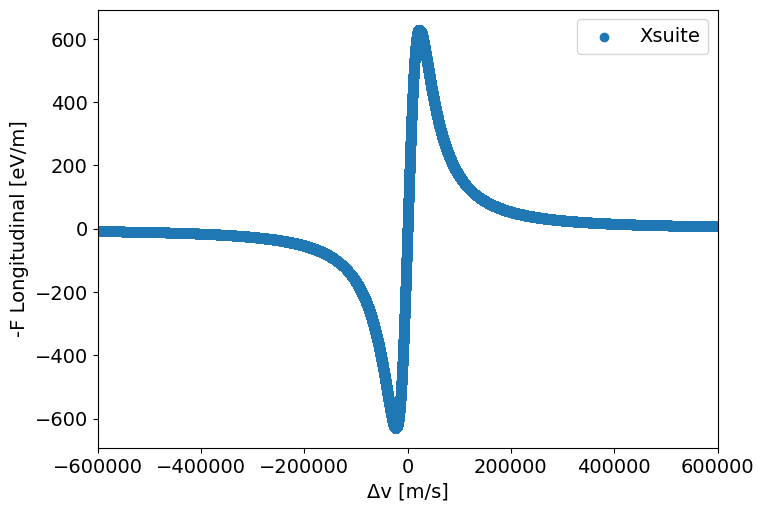

In [11]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(8, 6))
plt.scatter(v_diff,-force,label='Xsuite')

#plt.axvline(temperature_to_velocity_1D(T_l),color='black',label='V(T longitudinal)')
#plt.axvline(temperature_to_velocity_1D(T_perp),color='purple',label='V(T transverse)')

plt.xlim([-6*1e5,6*1e5])
#plt.ylim([0,250])
#plt.title(f'LEIR: F Longitudinal vs Δv')
plt.legend()
plt.ylabel('-F Longitudinal [eV/m]')
plt.xlabel('Δv [m/s]')
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))

plt.ticklabel_format(useOffset=False,style='plain')
plt.subplots_adjust(bottom=0.15)
plt.show()

In [12]:
filepath=f'results/friction-force-xsuite_I={current}.npz'



np.savez(filepath, v_diff=v_diff, force=force)